***Using Svm to classify wether cells are benign (non-cancerous) or malignant(cancerous).***

In this dataset we have 10 attributes

    identifier
    clump thickness
    uniformity of cell shape
    uniformity of cell size
    marginal adhesion
    bare nuclei
    normal nucleoi
    mitoses
    bland chromatin
    class->Bengin/Malignant


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('/content/cell_samples(10).csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [46]:
df.dropna(inplace=True)

In [47]:
df['Class'].value_counts()

,count
Class,
2,458
4,241


<Axes: xlabel='Clump', ylabel='UnifSize'>

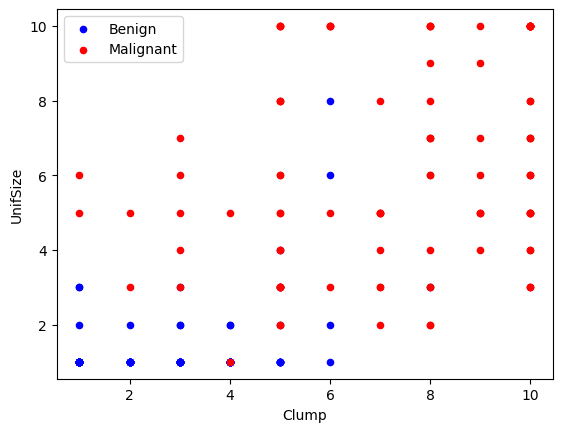

In [48]:
benign_df=df[df['Class']==2][0:100]
malignant_df=df[df['Class']==4][0:100]

ax=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Malignant' , ax=ax)

In [49]:
df.dtypes # identifying datatype columns

,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,int64
BlandChrom,int64
NormNucl,int64
Mit,int64


In [50]:
x=df.drop(['Class' , 'ID'],axis=1)
y=df['Class']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [52]:
from sklearn import svm
classifier=svm.SVC(kernel='linear' , gamma='auto' , C=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[91  1]
 [ 3 45]]
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        92
           4       0.98      0.94      0.96        48

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

